# 실습 예제 연습용 주피터  


## 서포트 벡터 머신 4주차 - 1 

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,:2] ## 길이와 폭만 사용
y = iris.target

In [12]:
from sklearn.model_selection import train_test_split
x_tn, x_te, y_tn, y_te = train_test_split(X,y, random_state = 0)


In [15]:
from sklearn.svm import SVC
model = SVC(kernel='linear').fit(x_tn,y_tn)


### 예제

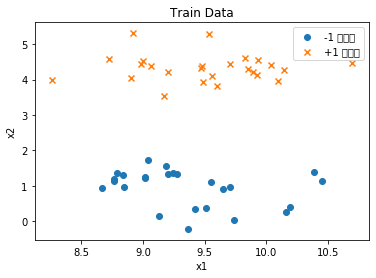

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")# 0번째 줄, 
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train Data")
plt.show()

## SVM 모델 훈련

In [19]:
from sklearn.svm import SVC
model = SVC(kernel='linear',C=1e10).fit(X,y) # C는 slack variable

## 시각화

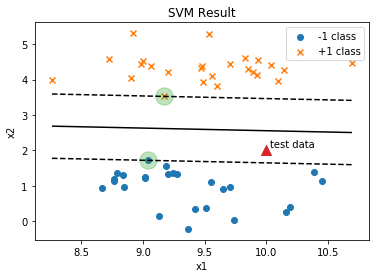

In [22]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10) # min~ max 10분할
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy) #직사각형의 그리드

Z = np.empty(X1.shape) #배열 생성 - 쓰레기값

for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]

levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Result")

plt.show()

SVC를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.

n_support_: 각 클래스의 서포트의 개수

support_: 각 클래스의 서포트의 인덱스

support_vectors_: 각 클래스의 서포트의 x 값. 𝑥+와 𝑥−

coef_: 𝑤 벡터

intercept_: −𝑤0

dual_coef_: 각 원소가 𝑎𝑖⋅𝑦𝑖로 이루어진 벡터

In [24]:
model.n_support_ # 서포트 개수

array([1, 1])

In [25]:
model.support_ # 서포트의 인덱스

array([42,  1])

In [26]:
model.support_vectors_ #각 클래스의 서포트의 x 값. 𝑥+와 𝑥−

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [27]:
model.coef_

array([[0.08171082, 1.10091404]])

In [28]:
model.intercept_

array([-3.62995208])

In [29]:
y[model.support_]

array([-1,  1])

## 가우시안 나이브 베이즈  4주차 - 2

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_te, model.predict(x_te)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.73      0.69      0.71        16
           2       0.50      0.56      0.53         9

    accuracy                           0.76        38
   macro avg       0.74      0.75      0.75        38
weighted avg       0.77      0.76      0.77        38



In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

In [3]:
from sklearn import datasets
raw_wine = datasets.load_wine()
X = raw_wine.data
y = raw_wine.target

In [4]:
#data 전처리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)

#data stardardize
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale.fit(X_train) # train data 정규화의 필요한 파라미터 뽑음
X_tn_std = std_scale.transform(X_train) #실제 정규화 일어남
X_te_std = std_scale.transform(X_test) # 실제 정규화
#정답은 정규화 할 필요 없음(categorical)

In [6]:
#모델 학습 (Gaussian Naive Bayes)
from sklearn.naive_bayes import GaussianNB
#가우시안이 무엇을 하는가
#표본평균하고 표본분산을 가진 정규분포하에 베이즈정리를 적용
mdl = GaussianNB()
mdl.fit(X_tn_std, y_train)

GaussianNB()

In [8]:
pred = mdl.predict(X_te_std)
print(pred)

[0 2 1 0 1 1 0 2 1 1 2 2 0 0 2 1 0 0 2 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0 2
 1 1 2 0 0 1 1 1]


In [ ]:
#성능 확인
from sklearn.metrics import classification_report
class_report = classification_report(y_test,pred)
print(class_report)